In [1]:
import pandas as pd
import os
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RNA_emb = [None, "X_pca", "X_scVI"]
ATAC_emb = [None, "X_lsi", "X_poissonvi"]
EMBEDDINGS = list(itertools.product(RNA_emb, ATAC_emb)) + [("X_MultiVI", "X_MultiVI")]
COSTS = [("sq_euclidean", None), ("cosine", None), ("geodesic", 50), ("geodesic", 100), ("geodesic", 30), ("geodesic", 5), ("geodesic", 10)]

In [3]:
metrics_early = pd.DataFrame(columns=["emb_0", "emb_1", "cost_0", "cost_1", "sink_div", "eps_from_eps_prog", "delta_from_fev_delta", "fev_delta_from_eps_prog", "eps_from_fev_delta", "beta_from_fev_beta", "delta_from_ngn3_low"])
metrics_late= pd.DataFrame(columns=["emb_0", "emb_1", "cost_0", "cost_1", "sink_div", "eps_from_eps_prog", "delta_from_fev_delta", "fev_delta_from_eps_prog", "eps_from_fev_delta", "beta_from_fev_beta", "delta_from_ngn3_low"])


In [4]:
out_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/stability_analysis"

In [5]:
outer_early = pd.read_csv(os.path.join(out_dir, f"stability_metrics_early_outer.csv"))
outer_late = pd.read_csv(os.path.join(out_dir, f"stability_metrics_late_outer.csv"))

In [6]:
outer_early

,Unnamed: 0,emb,cost_0,cost_1,sink_div,eps_from_eps_prog,delta_from_fev_delta,fev_delta_from_eps_prog,eps_from_fev_delta,beta_from_fev_beta,delta_from_ngn3_low,emb_0,emb_1
0,0,NaN,ref,ref,6.886811,0.034237,0.025205,0.034237,0.025205,0.069313,0.195337,ref,ref


In [7]:
for emb_1, emb_2 in EMBEDDINGS:
    for cost_1, cost_2 in COSTS:
        try:
            m_early = pd.read_csv(os.path.join(out_dir, f"stability_metrics_early_{emb_1}_{emb_2}_{cost_1}_{cost_2}_new2.csv"))
            m_late = pd.read_csv(os.path.join(out_dir, f"stability_metrics_late_{emb_1}_{emb_2}_{cost_1}_{cost_2}_new2.csv"))
            metrics_early = pd.concat((metrics_early, m_early))
            metrics_late = pd.concat((metrics_late, m_late))
        except FileNotFoundError:
            continue

In [8]:
len(metrics_early), len(metrics_late)

(63, 63)

In [9]:
emb_1="X_MultiVI"
emb_2="X_MultiVI"
cost_1 = "geodesic"
cost_2 = 30
used_early = pd.read_csv(os.path.join(out_dir, f"stability_metrics_early_{emb_1}_{emb_2}_{cost_1}_{cost_2}_new2.csv"))
used_late = pd.read_csv(os.path.join(out_dir, f"stability_metrics_late_{emb_1}_{emb_2}_{cost_1}_{cost_2}_new2.csv"))

In [10]:
import seaborn as sns

In [11]:
cols_1 = ["eps_from_eps_prog", "delta_from_fev_delta", "fev_delta_from_eps_prog", "eps_from_fev_delta", "beta_from_fev_beta"]

In [12]:
df_early_new_1 = pd.DataFrame(metrics_early[cols_1].unstack())
df_late_new_1 = pd.DataFrame(metrics_late[cols_1].unstack())
outer_early_new = pd.DataFrame(outer_early[cols_1].unstack())
outer_late_new = pd.DataFrame(outer_late[cols_1].unstack())
df_outer = pd.concat((outer_early_new, outer_late_new), keys=["early", "late"])
df_outer= df_outer.reset_index()
df_1 = pd.concat((df_early_new_1, df_late_new_1), keys=["early", "late"])
df_1 = df_1.reset_index()

In [13]:
palette = ["#f5d889", "#c5faeb"]
palette_baseline = ["#f77b72", "#f77b72"]

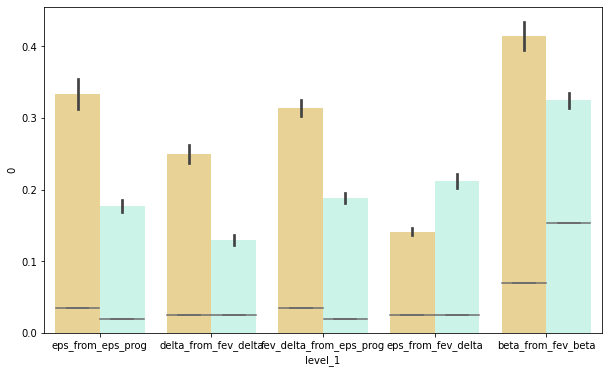

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df_1, x="level_1", y=0, hue="level_0", errorbar="se", palette=palette, ax=ax)
sns.boxplot(data=df_outer, x="level_1", y=0, hue="level_0", palette=palette_baseline, ax=ax)
ax.get_legend().remove()

In [15]:
cols_2 = ["sink_div"]

In [16]:
df_early_new_2 = pd.DataFrame(metrics_early[cols_2].unstack())
df_late_new_2 = pd.DataFrame(metrics_late[cols_2].unstack())

In [17]:
df_2 = pd.concat((df_early_new_2, df_late_new_2), keys=["early", "late"])

In [18]:
df_2 = df_2.reset_index()

In [19]:
df_outer2 = pd.concat((outer_early[cols_2], outer_late[cols_2]), keys=["early", "late"])
df_outer2= df_outer2.reset_index()


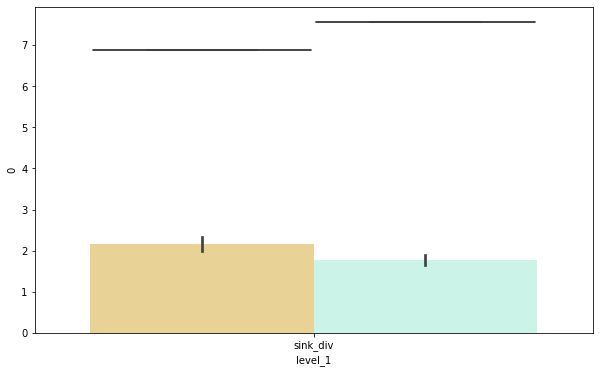

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_outer2, x="level_1", y="sink_div", hue="level_0", ax=ax)
sns.barplot(data=df_2, x="level_1", y=0, hue="level_0", errorbar="se", palette=palette, ax=ax)
ax.get_legend().remove()

In [21]:
df_3 = pd.concat((metrics_early, metrics_late), keys=["early", "late"])
df_3 = df_3.reset_index()

In [22]:
df_outer3 = pd.concat((outer_early, outer_late), keys=["early", "late"])
df_outer3 = df_outer3.reset_index()

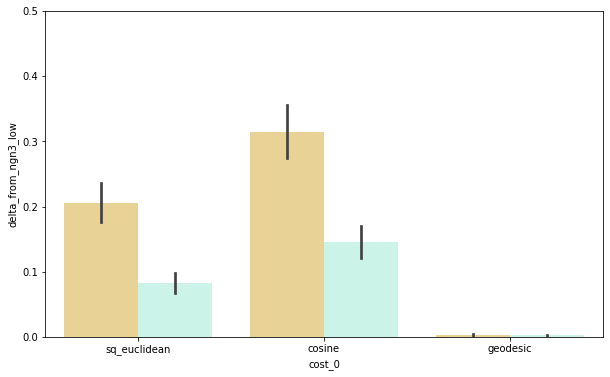

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(df_3, x="cost_0", y="delta_from_ngn3_low", errorbar="se", hue="level_0", palette=palette)
ax.set_ylim(0, 0.5)
ax.get_legend().remove()